In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest

In [44]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Missing values:
This code will first check if there are any missing values in the dataset, and if there are none, it will display a message.

There are no missing values in the dataset.


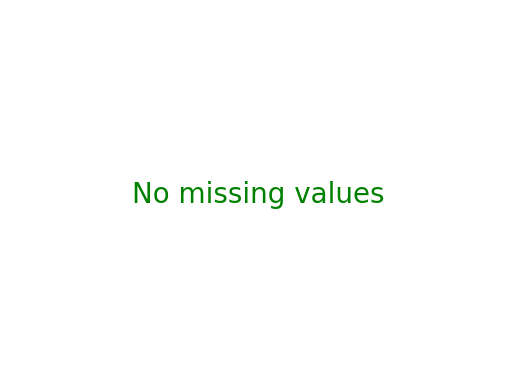

In [45]:
missing = data.isnull().sum().sum()

if missing == 0:
    print("There are no missing values in the dataset.")
    fig, ax = plt.subplots()
    ax.text(0.5, 0.5, "No missing values", ha="center", va="center", fontsize=20, color="green")
    ax.axis("off")
    plt.show()
else:
    print(f"There are {missing} missing values in the dataset.")
    fig, ax = plt.subplots()
    ax.text(0.5, 0.5, "Missing values", ha="center", va="center", fontsize=20, color="red")
    ax.axis("off")
    plt.show()

In [46]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Upsampling the minority class.

In [47]:
X_upsampled, y_upsampled = resample(X_train[y_train == 1], y_train[y_train == 1], 
                                    replace=True, n_samples=X_train[y_train == 0].shape[0])
X_train_balanced = pd.concat([X_train[y_train == 0], X_upsampled])
y_train_balanced = pd.concat([y_train[y_train == 0], y_upsampled])

Plotting the results of unsampling.

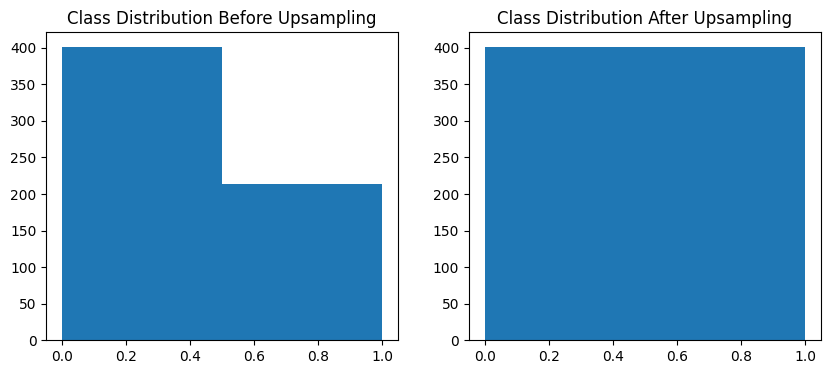

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(y_train, bins=2)
ax[0].set_title("Class Distribution Before Upsampling")
ax[1].hist(y_train_balanced, bins=2)
ax[1].set_title("Class Distribution After Upsampling")
plt.show()

The implementation of feature scaling.

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

Implementing the feature selection -  the top 6 features with the highest F-value are selected for the final model.

In [50]:
selector = SelectKBest(f_classif, k=6)
X_train_selected = selector.fit_transform(X_train_scaled, y_train_balanced)
X_test_selected = selector.transform(X_test_scaled)

A bar plot of the feature importances after feature selection.

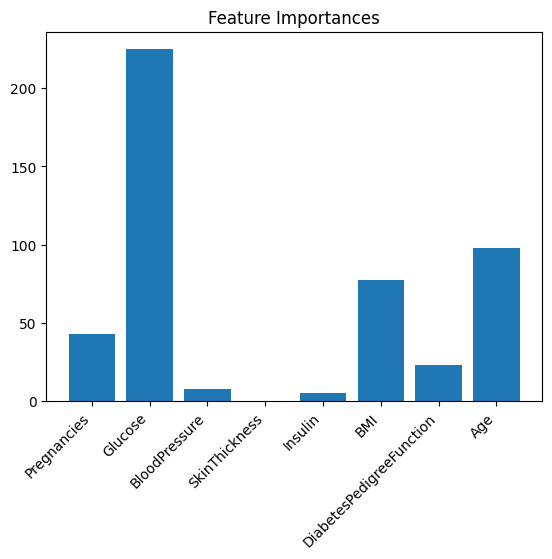

In [51]:
fig, ax = plt.subplots()
ax.bar(np.arange(X_train.shape[1]), selector.scores_)
ax.set_xticks(np.arange(X_train.shape[1]))
ax.set_xticklabels(X_train.columns, rotation=45, ha='right')
ax.set_title("Feature Importances")
plt.show()

Detecting outliers using Isolation Forest.

In [52]:
outlier_detector = IsolationForest(contamination=0.1, random_state=42)
outlier_detector.fit(X_train_selected)
is_inlier = outlier_detector.predict(X_train_selected)
X_train_clean = X_train_selected[is_inlier == 1]
y_train_clean = y_train_balanced[is_inlier == 1]

Outlier detection results before and after cleaning.

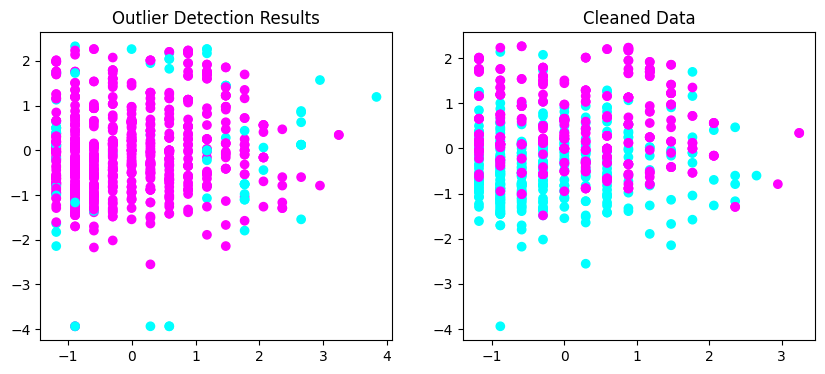

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(X_train_selected[:, 0], X_train_selected[:, 1], c=is_inlier, cmap='cool')
ax[0].set_title("Outlier Detection Results")
ax[1].scatter(X_train_clean[:, 0], X_train_clean[:, 1], c=y_train_clean, cmap='cool')
ax[1].set_title("Cleaned Data")
plt.show()

Convert NumPy arrays to pandas dataframes in order to save the processed dataset to a single .csv file

In [57]:
X.to_csv("pima-indians-diabetes-features.csv", index=False)
y.to_csv("pima-indians-diabetes-target.csv", index=False)